Partie 1 : Preprocessing des données 
Phase de nettoyage des différents tableaux de données (PIB, PIB/hab, IDH, score, Dépenses) et mise sous le même format afin d'aboutir à "df_merged_final2", la table netoyée et fusionnant toutes les sources de données. 

In [129]:
import sys
sys.path.append("../Scriptsfinal")  # dossier contenant tous tes scripts
import importlib
import medals
import pib_eu
import depenses
import Visu3
import Reg3
import merge_data


importlib.reload(medals)
importlib.reload(pib_eu)
importlib.reload(depenses)
importlib.reload(Visu3)
importlib.reload(Reg3)
importlib.reload(merge_data)


# Importer les fonctions ou variables de chaque script
from medals import process_medals         # df_all_games, df_score
from pib_eu import process_pib_eu         # df_PIB_long
from pib_world import process_pib_world   # df_PIB_hab
from idh import process_idh               # df_IDH
from merge_data import merge_all           # df_merged_final2
from depenses import process_depenses     # df_merged_final avec dépenses
from Visu3 import plot_score_vs_spending
from Reg3 import run_ols





In [130]:
df_all_games, df_score = process_medals()

df_score.head(10)

,Year,Team,Score
0,1896,Australia,10
1,1896,Australia/Great Britain,1
2,1896,Austria,14
3,1896,Denmark,12
4,1896,Ethnikos Gymnastikos Syllogos,1
5,1896,France,35
6,1896,Germany,42
7,1896,Great Britain,18
8,1896,Great Britain/Germany,5
9,1896,Greece,98


In [131]:


df_PIB_long = process_pib_eu()
df_PIB_long.head(20)


/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: Données!$1:$1048576.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Team,Country Code,Year,PIB
0,Austria,AUT,2016,318.0072
1,Belgium,BEL,2016,381.1002
2,Spain,ESP,2016,1213.8740
3,Estonia,EST,2016,29.2015
4,Finland,FIN,2016,170.1131
5,France,FRA,2016,1987.5494
6,Ireland,IRL,2016,241.5633
7,Italy,ITA,2016,1690.5546
8,Lithuania,LTU,2016,61.5078
9,Austria,AUT,2021,359.7171


In [132]:
df_PIB_hab = process_pib_world()
df_PIB_hab.head(10)

,Country Name,Country Code,JO Year,PIB_mean
0,Aruba,ABW,2012,25778.051271
1,NaN,AFE,2012,1536.255359
2,Afghanistan,AFG,2012,500.275781
3,NaN,AFW,2012,1657.933736
4,Angola,AGO,2012,3863.241475
5,Albanie,ALB,2012,4331.752197
6,Andorre,AND,2012,45627.880286
7,Le monde arabe,ARB,2012,6012.220713
8,Émirats arabes unis,ARE,2012,45585.739560
9,Argentine,ARG,2012,10014.690007


In [144]:
df_IDH = process_idh()
df_IDH.head(10)



,Country,Year_IDH,HDI,Year
0,Very high human development,1990,NaN,1996.0
1,Iceland,1990,0.841,1996.0
2,Norway,1990,0.856,1996.0
3,Switzerland,1990,0.858,1996.0
4,Denmark,1990,0.844,1996.0
5,Germany,1990,0.834,1996.0
6,Sweden,1990,0.818,1996.0
7,Australia,1990,0.867,1996.0
8,"Hong Kong, China (SAR)",1990,0.755,1996.0
9,Netherlands,1990,0.855,1996.0


In [134]:
df_depenses = process_depenses()
df_depenses.head(10)

,Country,Year,Dépenses
0,Germany,2015,2.0
1,Germany,2016,2.0
2,Germany,2017,2.0
3,Germany,2018,2.0
4,Germany,2019,2.0
5,Germany,2020,2.2
6,Germany,2021,2.0
7,Germany,2022,2.0
8,Germany,2023,2.0
9,Austria,2015,2.5


In [ ]:
df_merged_final2 = merge_all(df_score, df_PIB_hab, df_IDH, df_depenses)
df_merged_final2.head(20)
df_merged_final2.to_csv("../data_cleanfinal/df_merged_final2.csv")

Phase 2 : Statistiques descriptives et réponse à notre problématique par des régressions et corrélations diverses

2.1 : Statistiques descriptives

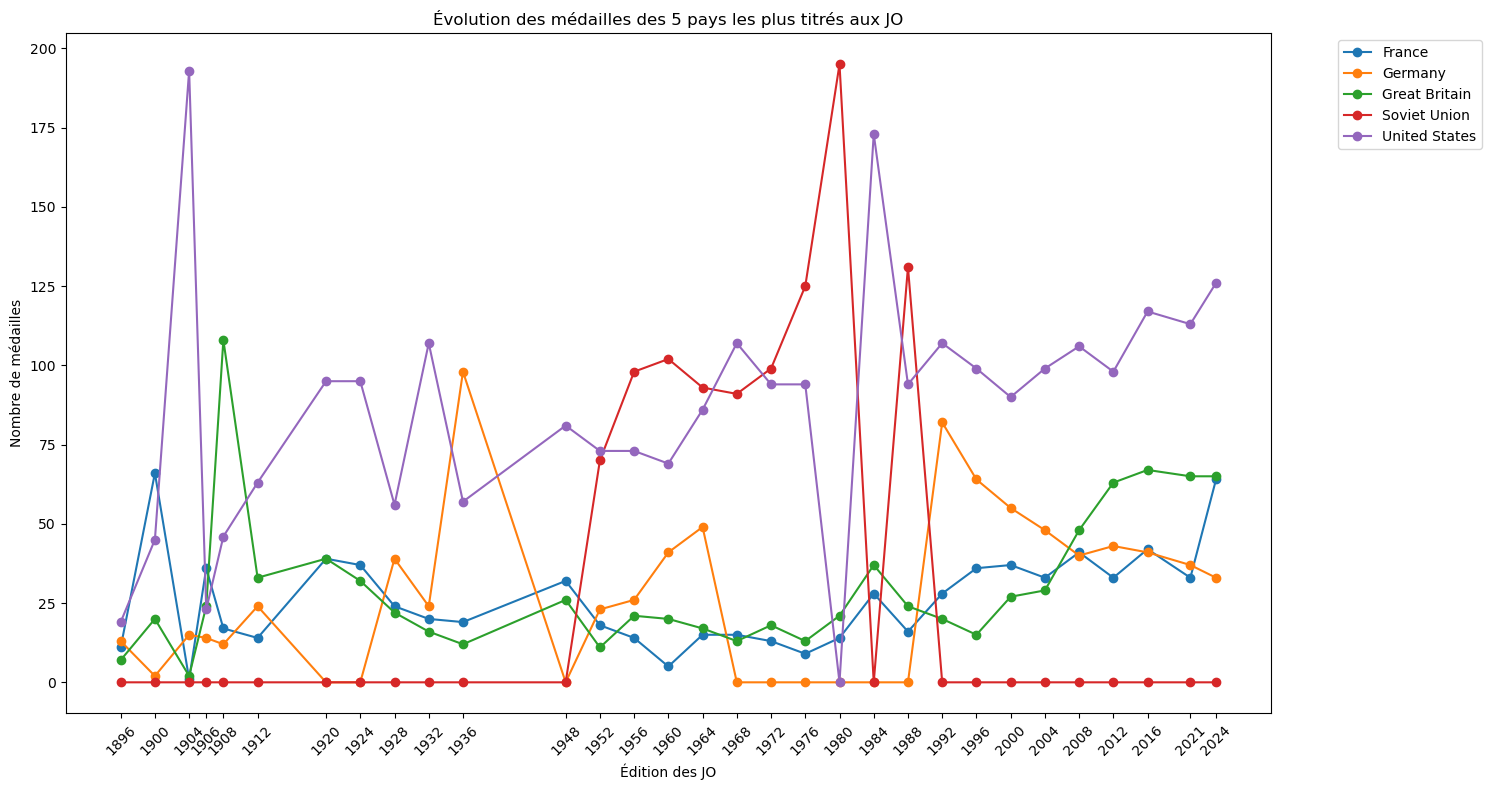

In [139]:
import matplotlib.pyplot as plt
top_countries = df_all_games.groupby('Team')['Count'].sum().sort_values(ascending=False).head(5).index

# Filtre du DataFrame pour garder que ces pays
df_top = df_all_games[df_all_games['Team'].isin(top_countries)]
df_top

df_agg = df_top.groupby(['Year', 'Team'])['Count'].sum().reset_index()
df_pivot = df_agg.pivot(index='Year', columns='Team', values='Count').fillna(0)

plt.figure(figsize=(15,8))

for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], marker='o', label=country)  # ajoute des points pour chaque JO

plt.title("Évolution des médailles des 5 pays les plus titrés aux JO")
plt.xlabel("Édition des JO")
plt.ylabel("Nombre de médailles")

# Mettre les années exactes comme ticks
plt.xticks(df_pivot.index, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [145]:
import matplotlib.pyplot as plt

#Exemples de pays
countries = ["France", "United States", "India", "Switzerland", "Norway", "China", "Bresil"]

# Colonnes avec les années ou périodes
cols_time = [1990, 2000, 2010, 2020, 2023]  
# Filtrer les données
df_plot = df_IDH[df_IDH['Country'].isin(countries)][['Country'] + cols_time]

df_long = df_plot.melt(id_vars='Country', value_vars=cols_time,
                       var_name='Period', value_name='HDI')
plt.figure(figsize=(10,6))
for country in countries:
    data = df_long[df_long['Country'] == country]
    plt.plot(data['Period'], data['HDI'], marker='o', label=country)

plt.title("Évolution de l'IDH au cours du temps")
plt.xlabel("Période")
plt.ylabel("IDH")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

KeyError: '[1990, 2000, 2010, 2020, 2023] not in index'

In [56]:

#Partie 3 : Régressions en utilisant les dépenses sous forme de volume (En Milliards de SPA)

import sys
sys.path.append("../Scriptsfinal")


from Prepro3 import prepare_data_volume
from Visu3 import plot_score_vs_spending
from Reg3 import run_ols



In [57]:
df = prepare_data_volume(
    "../data_clean/df_merged_final2.csv",
    "../data_clean/PIB_EU_long.csv"
)


In [ ]:
plot_score_vs_spending(
    df,
    save_path="../ResultsV2/score_vs_depenses_volume.png"
)


In [ ]:
model_simple = run_ols(
    df,
    y_var="Score",
    x_vars=["Dépenses_volume"]
)
model_simple.summary()


In [62]:
import importlib
import Prepro_long3
import pandas as pd
importlib.reload(Prepro_long3)
from Prepro_long1 import prepare_data_long
from Reg3 import run_ols


df_previous = pd.read_csv("../data_clean/df_used_for_regression2.csv")

df_long = prepare_data_long(df, df_previous)




In [ ]:
model_long = run_ols(
    df_long,
    y_var="Score",
    x_vars=["Dépenses_volume", "score_précédent"]
)
print(model_long.summary())